# Enron analysis
## Team 7

In [103]:
import numpy as np 
import pandas as pd
import os

import re
import nltk 
import spacy 
import string 
import email
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data cleaning

In [104]:
def get_raw_text(emails):
    email_text = []
    for email in emails.walk():
        if email.get_content_type() == 'text/plain':
            email_text.append(email.get_payload())
    return ''.join(email_text)

def clean_column(data):
    if data is not None:
        stopwords_list = stopwords.words('english')
        #exclusions = ['RE:', 'Re:', 're:']
        #exclusions = '|'.join(exclusions)
        data =  data.lower()
        data = re.sub('re:', '', data)
        data = re.sub('-', '', data)
        data = re.sub('_', '', data)
        # Remove data between square brackets
        data =re.sub('\[[^]]*\]', '', data)
        # removes punctuation
        data = re.sub(r'[^\w\s]','',data)
        data = re.sub(r'\n',' ',data)
        data = re.sub(r'[0-9]+','',data)
        # strip html 
        p = re.compile(r'<.*?>')
        data = re.sub(r"\'ve", " have ", data)
        data = re.sub(r"can't", "cannot ", data)
        data = re.sub(r"n't", " not ", data)
        data = re.sub(r"I'm", "I am", data)
        data = re.sub(r" m ", " am ", data)
        data = re.sub(r"\'re", " are ", data)
        data = re.sub(r"\'d", " would ", data)
        data = re.sub(r"\'ll", " will ", data)
        data = re.sub('forwarded by phillip k allenhouect on    pm', '',data)
        data = re.sub(r"httpitcappscorpenroncomsrrsauthemaillinkaspidpage", "", data)
        
        data = p.sub('', data)
        if 'forwarded by:' in data:
            data = data.split('subject')[1]
        data = data.strip()
        return data
    return 'No Subject'


In [105]:
dirname = "../data"
filename = "emails.csv"

In [106]:
e_namefile = os.path.join(dirname, filename)

In [107]:
e_namefile

'../data/emails.csv'

In [109]:
e_namefile = os.path.join(dirname, filename)
enron = pd.read_csv(e_namefile, nrows=40000)
emails = list(map(email.parser.Parser().parsestr,enron['message']))
headings  = emails[0].keys()

In [110]:
for key in headings:
    enron[key] = [doc[key] for doc in emails]
    
enron['body'] = list(map(get_raw_text, emails))
enron['Subject_new'] = enron['Subject'].apply(clean_column)
enron['body_new'] = enron['body'].apply(clean_column)

### Sentiment implementation

In [112]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [113]:
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [12]:
email  = "I would love to watch the magic show again"
email2 = "What the hell they have made. Pathetic!"
email3 = " I do not know what to do"
email4 = "You are a bunch of idiots, you must consider quitting"
#print (sentiment_analyzer_score(email))
#print (sentiment_analyzer_score(email2))
#print (sentiment_analyzer_score(email3))

tmp = sentiment_analyzer_score(email4)
print(tmp)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [13]:
sentiment_analyzer_score("You are cool")

{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.3182}

In [114]:
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = enron['body_new'].apply(tokenizer.tokenize)
words_descriptions.head()

0                            [here, is, our, forecast]
1    [traveling, to, have, a, business, meeting, ta...
2                      [test, successful, way, to, go]
3    [randy, can, you, send, me, a, schedule, of, t...
4                      [lets, shoot, for, tuesday, at]
Name: body_new, dtype: object

In [ ]:
enron

In [115]:
all_words = [word for tokens in words_descriptions for word in tokens]
enron['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

8648004 words total, with a vocabulary size of 116519


In [116]:
enron['scores'] = enron['body_new'].apply(lambda review: analyser.polarity_scores(review))
enron.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,body,Subject_new,body_new,description_lengths,scores
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,,here is our forecast,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,,traveling to have a business meeting takes the...,139,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp..."
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,test,test successful way to go,5,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp..."
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",,randy can you send me a schedule of the sala...,34,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,hello,lets shoot for tuesday at,5,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp..."


In [117]:
enron['compound']  = enron['scores'].apply(lambda score_dict: score_dict['compound'])
enron['neg'] = enron['scores'].apply(lambda score_dict: score_dict['neg'])
enron['pos'] = enron['scores'].apply(lambda score_dict: score_dict['pos'])
enron['neu'] = enron['scores'].apply(lambda score_dict: score_dict['neu'])

In [19]:
enron['compound'].describe()

count    5000.000000
mean        0.508573
std         0.460153
min        -0.994900
25%         0.025800
50%         0.637600
75%         0.915225
max         1.000000
Name: compound, dtype: float64

### EDA

In [118]:
from plotnine import *

In [119]:
fig = (
    ggplot(enron.dropna(subset = ['compound'])) +
    geom_histogram(aes(x='compound'))
)

/app/.venv/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 54'. Pick better value with 'binwidth'.


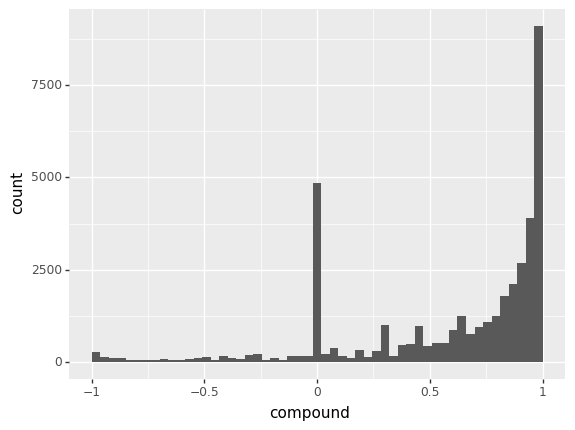

<ggplot: (8776641014489)>

In [120]:
fig

/app/.venv/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10


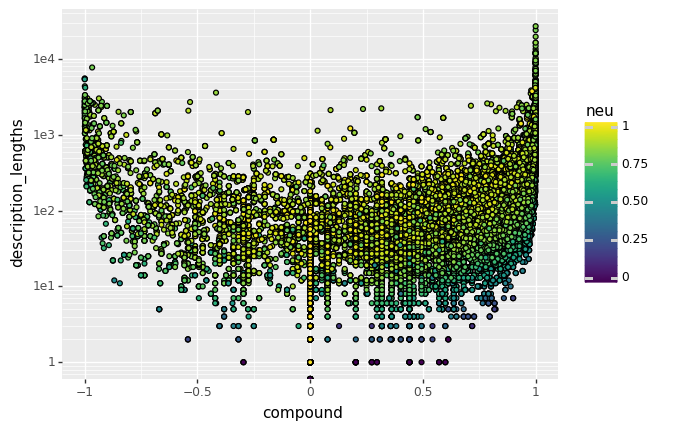

<ggplot: (8776649214564)>

In [141]:
fig = (
    ggplot(enron.dropna(subset = ['compound'])) +
    geom_point(
        aes( x = 'compound',
             y = 'description_lengths',
          fill = 'neu'),
         color = 'black'
    ) +
    scale_y_log10()
)
fig

/app/.venv/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10


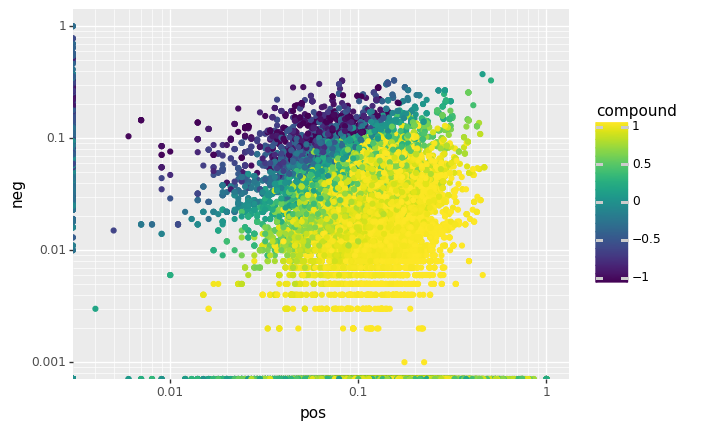

<ggplot: (8776641843393)>

In [121]:
fig = (
    ggplot(enron.dropna(subset = ['compound'])) +
    geom_point(
        aes( x = 'pos',
             y = 'neg',
            color = 'compound'#,
           # size = 'neu'
           )
    ) +
    scale_y_log10() +
    scale_x_log10()
)
fig

### Spacy

In [126]:
nlp = spacy.load('en_core_web_sm')

In [26]:
doc = nlp(enron['body_new'][14])
for token in doc:
    print(token.text, token.pos_, token.dep_)

dave PROPN nsubj
    SPACE dep
here ADV advmod
are AUX ROOT
the DET det
names NOUN attr
of ADP prep
the DET det
west PROPN compound
desk PROPN compound
members NOUN pobj
by ADP prep
category NOUN pobj
  SPACE dep
the DET det
origination NOUN compound
  SPACE dep
side NOUN nsubj
is AUX conj
very ADV advmod
sparse ADJ amod
        SPACE dep
phillip NOUN attr


In [27]:
print(doc)

dave    here are the names of the west desk members by category  the origination  side is very sparse        phillip


In [125]:
enron.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-FileName,body,Subject_new,body_new,description_lengths,scores,compound,neg,pos,neu
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,pallen (Non-Privileged).pst,Here is our forecast\n\n,,here is our forecast,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,,traveling to have a business meeting takes the...,139,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...",0.9313,0.000,0.107,0.893
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,pallen.nsf,test successful. way to go!!!,test,test successful way to go,5,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.5859,0.000,0.487,0.513
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",,randy can you send me a schedule of the sala...,34,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,pallen.nsf,Let's shoot for Tuesday at 11:45.,hello,lets shoot for tuesday at,5,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",-0.3400,0.375,0.000,0.625


In [29]:
for ent in doc.ents:
    print(ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))

0 8 PERSON People, including fictional


In [30]:
ent.label_

'PERSON'

In [ ]:
enrample = enron.head()
enrample['nlp'] = enrample['body_new'].apply(lambda x: [ spacy.explain(ent.label_) for ent in nlp(x).ents ])
enrample['nlp_ent'] = enrample['body_new'].apply(lambda x: [ ent.text for ent in nlp(x).ents ])
enrample['doc'] = enrample['body_new'].apply(lambda x: nlp(x))

In [ ]:
enrample = enron
enrample['nlp'] = enrample['body_new'].apply(lambda x: [ spacy.explain(ent.label_) for ent in nlp(x).ents ])
enrample['nlp_ent'] = enrample['body_new'].apply(lambda x: [ ent.text for ent in nlp(x).ents ])
enrample['doc'] = enrample['body_new'].apply(lambda x: nlp(x))

In [132]:
enrample[["body_new","scores","nlp","nlp_ent","doc"]].head()

,body_new,scores,nlp,nlp_ent,doc
0,here is our forecast,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",[],[],"(here, is, our, forecast)"
1,traveling to have a business meeting takes the...,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...","[People, including fictional]",[austin],"(traveling, to, have, a, business, meeting, ta..."
2,test successful way to go,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",[],[],"(test, successful, , way, to, go)"
3,randy can you send me a schedule of the sala...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","[People, including fictional, People, includin...","[randy , patti s]","(randy, , can, you, send, me, a, schedule, o..."
4,lets shoot for tuesday at,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",[Absolute or relative dates or periods],[tuesday],"(lets, shoot, for, tuesday, at)"


In [38]:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

In [69]:
long_mail = str(
    enron.iloc[enron['description_lengths'].idxmax()]['body_new']
)
doc = nlp(long_mail)

In [93]:
for token in doc:
    print(token.text, doc.vocab.strings[token.text])
    
#    print(ent, ent.start_char, ent.end_char, ent.label_, spacy.explain(ent.label_))

as 7437575085468336610
final 17941709405052808741
exams 6166652873041953562
begin 11234294172215200015
power 10405720708504167118
is 3411606890003347522
a 11901859001352538922
big 15511632813958231649
question 10779227342117629034
the 7425985699627899538
new 4753564829687343602
york 2781019763248568108
times 12380071558262218793
   12127836336259238092
british 5280546428154550536
telecom 7178986514143706975
the 7425985699627899538
times 12380071558262218793
of 886050111519832510
london 686896126224900680
   12127836336259238092
houston 15360160487126084491
needs 1326643797369586373
to 3791531372978436496
think 16875814820671380748
small 16938367552274787525
about 942632335873952620
future 17783898315335276456
technology 1740049878576065363
houston 15360160487126084491
chronicle 7466630541786534149
   12127836336259238092
panel 8706781270772614968
plots 9833087798538724016
new 4753564829687343602
course 2739140241061867786
for 16037325823156266367
areas 8712024525343010093
future 177838

In [87]:
doc.vocab.strings["intensidad"]

7320377109042860427

In [133]:
text_to_compare = "You are a complete mess!"
doc_to_compare = nlp(text_to_compare)
enrample['similarity'] = enrample['doc'].apply( [ lambda x: doc_to_compare.similarity(x)])
enrample[["body_new","doc","similarity"]]

/tmp/ipykernel_40/3123563265.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
/tmp/ipykernel_40/3123563265.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.


,body_new,doc,similarity
0,here is our forecast,"(here, is, our, forecast)",0.355960
1,traveling to have a business meeting takes the...,"(traveling, to, have, a, business, meeting, ta...",0.247748
2,test successful way to go,"(test, successful, , way, to, go)",0.184260
3,randy can you send me a schedule of the sala...,"(randy, , can, you, send, me, a, schedule, o...",0.153332
4,lets shoot for tuesday at,"(lets, shoot, for, tuesday, at)",-0.016172
...,...,...,...
39995,forwarded by larry f campbellnaenron on pm ...,"(forwarded, by, larry, f, campbellnaenron, on,...",-0.005078
39996,forwarded by larry f campbellnaenron on pm ...,"(forwarded, by, larry, f, campbellnaenron, on,...",-0.026708
39997,httpwwwvegasinsidercomufootballcollegereturnee...,(httpwwwvegasinsidercomufootballcollegereturne...,0.141924
39998,ill call you later tonight lc,"(ill, call, you, later, tonight, , lc)",0.325020


In [137]:
enrample.iloc[enrample['similarity'].argmax()]

file                                                  arnold-j/sent_items/779.
message                      Message-ID: <16156767.1075861674990.JavaMail.e...
Message-ID                       <16156767.1075861674990.JavaMail.evans@thyme>
Date                                     Fri, 16 Nov 2001 08:25:56 -0800 (PST)
From                                                     john.arnold@enron.com
To                                                    margaret.allen@enron.com
Subject                                                                       
Mime-Version                                                               1.0
Content-Type                                      text/plain; charset=us-ascii
Content-Transfer-Encoding                                                 7bit
X-From                       Arnold, John </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...
X-To                         Allen, Margaret </O=ENRON/OU=NA/CN=RECIPIENTS/...
X-cc                                                

In [145]:
enrample[["Date","From","To","Subject_new","body_new",
          "description_lengths","compound","neg",
          "pos","neu","nlp","nlp_ent","doc","similarity"]].head()

,Date,From,To,Subject_new,body_new,description_lengths,compound,neg,pos,neu,nlp,nlp_ent,doc,similarity
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,here is our forecast,4,0.0000,0.000,0.000,1.000,[],[],"(here, is, our, forecast)",0.355960
1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,,traveling to have a business meeting takes the...,139,0.9313,0.000,0.107,0.893,"[People, including fictional]",[austin],"(traveling, to, have, a, business, meeting, ta...",0.247748
2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,test,test successful way to go,5,0.5859,0.000,0.487,0.513,[],[],"(test, successful, , way, to, go)",0.184260
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,randy can you send me a schedule of the sala...,34,0.0000,0.000,0.000,1.000,"[People, including fictional, People, includin...","[randy , patti s]","(randy, , can, you, send, me, a, schedule, o...",0.153332
4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,hello,lets shoot for tuesday at,5,-0.3400,0.375,0.000,0.625,[Absolute or relative dates or periods],[tuesday],"(lets, shoot, for, tuesday, at)",-0.016172


In [148]:
enrample[["Date","From","To","Subject_new","body_new",
          "description_lengths","compound","neg",
          "pos","neu","nlp","nlp_ent","doc","similarity"]].to_csv(os.path.join(dirname, 'emails_with_data.csv'), index=False)